## setup

In [1]:
import google.generativeai as genai
import os

from dotenv import load_dotenv

load_dotenv()

#genai.configure(api_key=os.environ["API_KEY"])
genai.configure(api_key=os.environ["GOOGLE_API_KEY"])

model = genai.GenerativeModel('gemini-1.5-flash')


In [2]:
prompt = "Write a story about a magic backpack."

response = model.generate_content(prompt)

print(response.text)

Elara had always been a dreamer. While other children played with dolls and trucks, she spent her days weaving fantastical stories in her head, sketching imaginary creatures, and longing for adventure. But life in the dusty, forgotten town of Whispering Pines offered little in the way of excitement. Until the day her grandmother gave her a dusty, leather backpack, its straps worn thin with age.

"This," her grandmother said, eyes twinkling, "was your grandfather's. It holds magic, Elara. But be careful, child. It only reveals its secrets to those with a heart full of wonder."

Elara, captivated, took the backpack. It felt strangely warm in her hands, a familiar weight despite its age. She carried it everywhere, even to the dusty library, where she spent her days lost in the worlds of books. One afternoon, while engrossed in a story about a courageous knight, she reached into the backpack. Her hand brushed against something smooth and cold.

Inside, nestled against the worn fabric, was 

## Generate text using combined text and image 

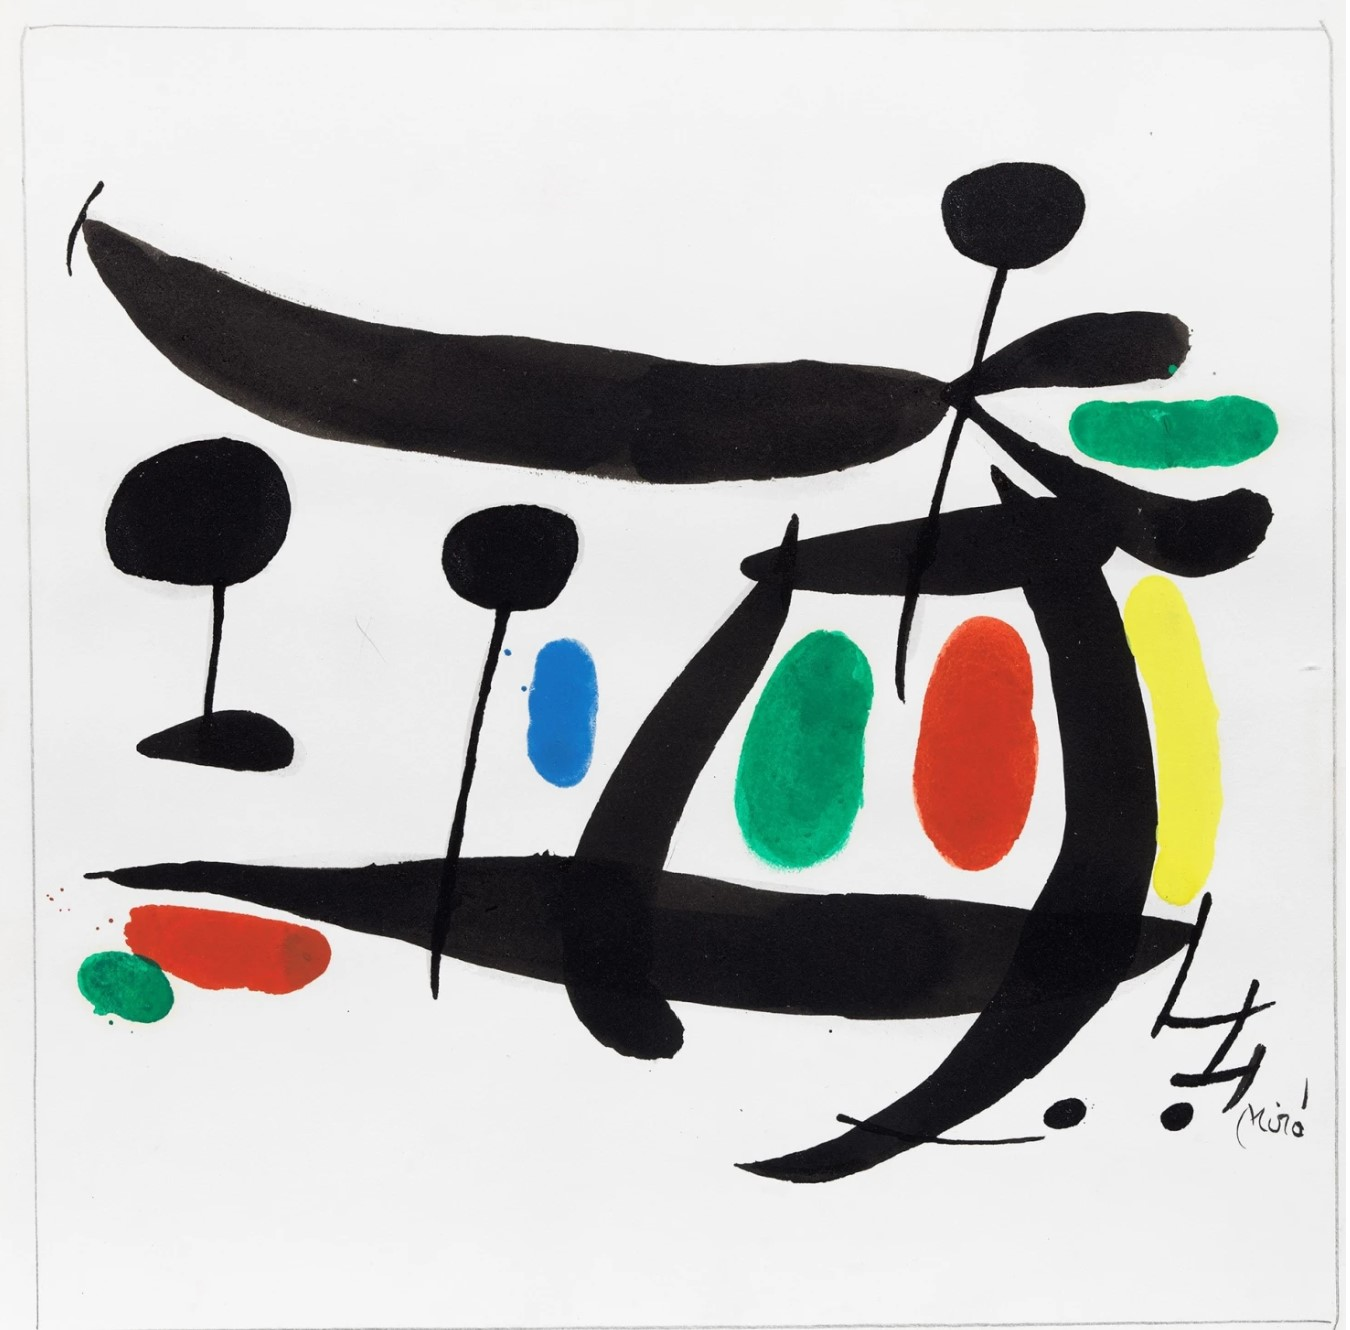

In [6]:
import pathlib
import PIL.Image

image1 = {
    'mime_type': 'image/jpeg',
    'data': pathlib.Path('image1.jpg').read_bytes()
}

img1 = PIL.Image.open('image1.jpg')
img1

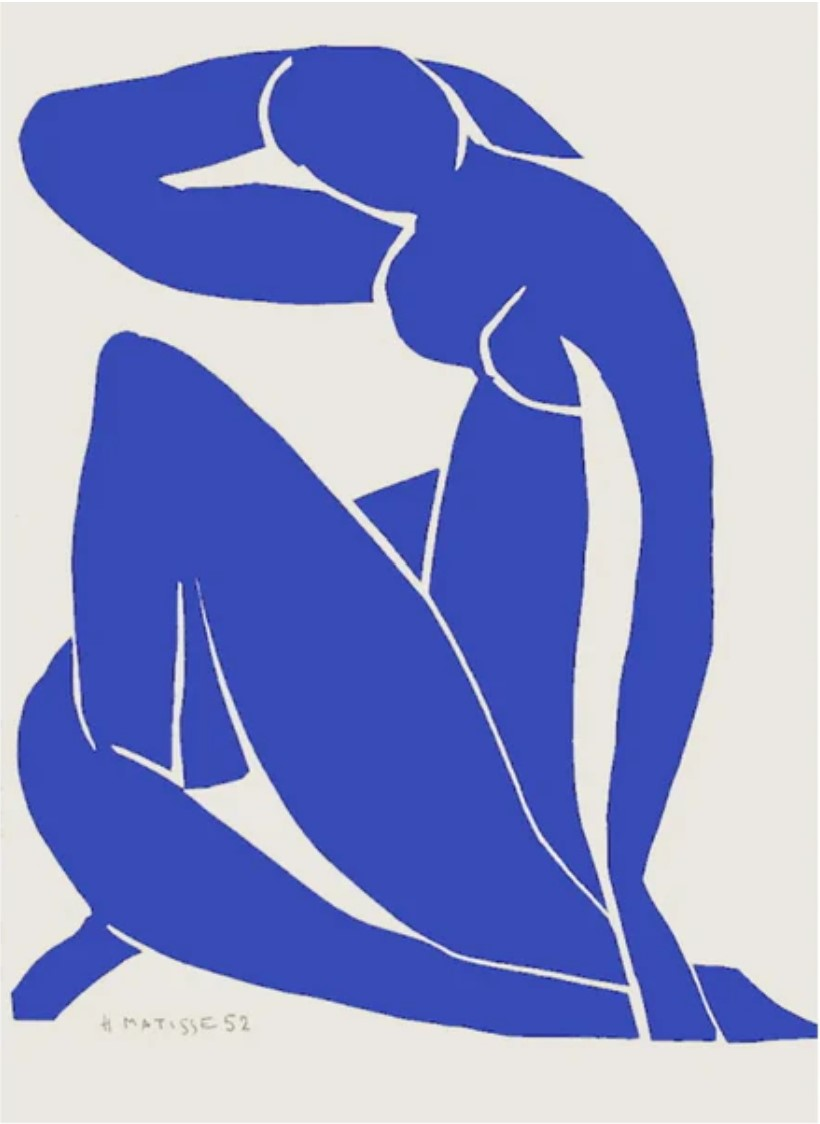

In [7]:
image2 = {
    'mime_type': 'image/jpeg',
    'data': pathlib.Path('image2.jpg').read_bytes()
}

img2 = PIL.Image.open('image2.jpg')
img2

In [8]:
prompt = "What's different between these pictures?"

response = model.generate_content([prompt, image1, image2])
print(response.text)

The first picture is an abstract painting by Joan Miró. It is composed of black lines and shapes, with a few spots of color. The second picture is a depiction of a nude woman, painted by Henri Matisse. It is made up of a single color, blue, and uses simple shapes to represent the figure.


## Text streaming

In [9]:
prompt = "Write a story about a magic backpack."

response = model.generate_content(prompt, stream=True)

for chunk in response:
  print(chunk.text)
  print("_"*80)

The
________________________________________________________________________________
 old, worn leather backpack had always been a source of fascination for twelve-year
________________________________________________________________________________
-old Finn. Found tucked away in his grandmother's attic, it had
________________________________________________________________________________
 a strange, almost magnetic pull. He'd tried to decipher its cryptic stitching, the worn leather, the faint scent of sea salt and woodsmoke that clung
________________________________________________________________________________
 to it. 

One rainy afternoon, with boredom gnawing at him, Finn decided to take the backpack on a walk through the woods behind his house.
________________________________________________________________________________
 He slung it over his shoulder, the leather surprisingly soft against his skin. As he walked, he felt a prickling sensation on his back, followed by a s

## chat

In [10]:
import os
import google.generativeai as genai

from dotenv import load_dotenv

load_dotenv()

genai.configure(api_key=os.environ['GOOGLE_API_KEY'])

model = genai.GenerativeModel('gemini-1.5-flash')
chat = model.start_chat(history=[])

response = chat.send_message(
    'In one sentence, explain how a smart phone works to a young child.')

print(response.text)

response = chat.send_message(
    'Okay, how about a more detailed explanation to a high schooler?')

print(response.text)

A smartphone is like a little computer in your hand that lets you talk to people, play games, and learn new things! 

A smartphone is essentially a mini-computer with a touchscreen interface that combines the functions of a phone, a camera, a music player, and a web browser, allowing you to access information, communicate with others, and be entertained all in one device. 



## Configration

In [11]:
model = genai.GenerativeModel(
    'gemini-1.5-flash',
    generation_config=genai.GenerationConfig(
        max_output_tokens=2000,
        temperature=0.9,
    ))

In [12]:
response = model.generate_content(
    'Write a story about a magic backpack.',
    generation_config = genai.GenerationConfig(
        max_output_tokens=1000,
        temperature=0.1,
    )
)

In [13]:
print(response.text)

Elara, a girl with eyes the color of storm clouds and hair like spun moonlight, had always felt different. While other children played with dolls and toy cars, she dreamt of faraway lands and whispered secrets to the wind. One day, while exploring the dusty attic of her grandmother's house, she stumbled upon a peculiar backpack tucked away in a forgotten corner. It was made of worn leather, its straps adorned with intricate silver embroidery. A faint, sweet scent of cinnamon and pine needles emanated from it.

Elara, drawn by an inexplicable pull, unzipped the backpack. Inside, nestled amongst a layer of soft, moss-green velvet, lay a single, shimmering feather. It pulsed with a soft, golden light, and as Elara touched it, a voice, as old as time itself, whispered in her ear, "Welcome, traveler. This is your passport to adventure."

From that day on, Elara's life was never the same. The backpack, imbued with ancient magic, became her constant companion. It held within its depths a worl